# Disable GPU (if needed)

In [1]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

# Minimal example - Keras API

[2019-12-11 19:54:19,944][ INFO][keras.py]::Feature maps shape: [[None, 23, 23, 1]]
[2019-12-11 19:54:19,946][ INFO][keras.py]::Input shape       : (None, 64, 64, 3)
[2019-12-11 19:54:20,073][ INFO][base.py]::Estimated receptive field for feature map [0]: ReceptiveFieldDescription(offset=(10.0, 10.0), stride=(2.0, 2.0), size=Size(w=20, h=20))


[FeatureMapDescription(size=Size(w=23, h=23), rf=ReceptiveFieldDescription(offset=(10.0, 10.0), stride=(2.0, 2.0), size=Size(w=20, h=20)))]


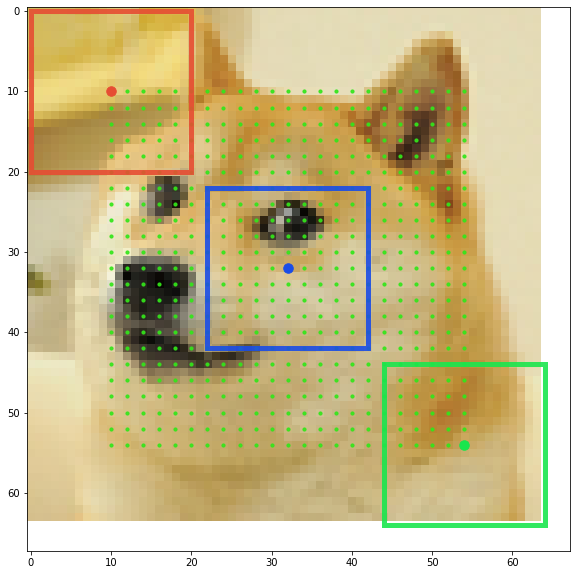

In [2]:
from tensorflow.keras.layers import Activation, Conv2D, Input
from tensorflow.keras.layers import AvgPool2D
from tensorflow.keras.models import Model
from receptivefield.image import get_default_image
from receptivefield.keras import KerasReceptiveField
import matplotlib.pyplot as plt

# define model function
def model_build_func(input_shape):
    act = 'linear' # see Remarks
    inp = Input(shape=input_shape, name='input_image')
    x = Conv2D(32, (7, 7), activation=act)(inp)
    x = Conv2D(32, (5, 5), activation=act)(x)
    x = AvgPool2D()(x)
    x = Conv2D(64, (5, 5), activation=act, name='feature_grid')(x)
    x = AvgPool2D()(x)
    model = Model(inp, x)
    return model

shape = [64, 64, 3]
# compute receptive field
rf = KerasReceptiveField(model_build_func)
rf_params = rf.compute(shape, 'input_image', ['feature_grid'])

# debug receptive field
rf.plot_rf_grids(get_default_image(shape, name='doge'), figsize=(10, 10))
print(rf_params)

In [3]:
rf.feature_maps_desc

[FeatureMapDescription(size=Size(w=23, h=23), rf=ReceptiveFieldDescription(offset=(10.0, 10.0), stride=(2.0, 2.0), size=Size(w=20, h=20)))]

In [4]:
rf.num_feature_maps

1

In [5]:
rf.input_shape

ImageShape(w=64, h=64, c=3)

In [6]:
rf.output_shapes

[Size(w=23, h=23)]